In [19]:
import numpy as np 
import pandas as pd
import os
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from glob import glob
from tqdm.notebook import tqdm
tqdm.pandas()
import random
import json
from sklearn.model_selection import train_test_split
import shutil
import yaml
plt.style.use("ggplot")

In [20]:
dataset_path = "/Users/huynhanhkiet/Desktop/Object_Detection/ArTaxOr/notebooks/data"
annotation_list = glob(f"{dataset_path}/*/annotations/*.json")

In [27]:
annotation_list

['/Users/huynhanhkiet/Desktop/Object_Detection/ArTaxOr/notebooks/data/Hemiptera/annotations/6bb72ba1e8995961da9844118ab78213-asset.json',
 '/Users/huynhanhkiet/Desktop/Object_Detection/ArTaxOr/notebooks/data/Hemiptera/annotations/f7db5316af783f862bb56370d9a7cd4b-asset.json',
 '/Users/huynhanhkiet/Desktop/Object_Detection/ArTaxOr/notebooks/data/Hemiptera/annotations/0b7984c66006eeba0872f31ca96f1d70-asset.json',
 '/Users/huynhanhkiet/Desktop/Object_Detection/ArTaxOr/notebooks/data/Hemiptera/annotations/2a5f9accd2eaa8659c72f3224f3329ed-asset.json',
 '/Users/huynhanhkiet/Desktop/Object_Detection/ArTaxOr/notebooks/data/Hemiptera/annotations/9e12ca5e69fa3b5998c056a5c548716e-asset.json',
 '/Users/huynhanhkiet/Desktop/Object_Detection/ArTaxOr/notebooks/data/Hemiptera/annotations/34d9eca9aef45ba0701ed9fb97650a83-asset.json',
 '/Users/huynhanhkiet/Desktop/Object_Detection/ArTaxOr/notebooks/data/Hemiptera/annotations/bd4ccc67576b4136076a6c23dcb48967-asset.json',
 '/Users/huynhanhkiet/Desktop/Obje

In [21]:
data = pd.DataFrame()
data["annotation_dir"] = annotation_list

In [22]:
data

,annotation_dir
0,/Users/huynhanhkiet/Desktop/Object_Detection/A...
1,/Users/huynhanhkiet/Desktop/Object_Detection/A...
2,/Users/huynhanhkiet/Desktop/Object_Detection/A...
3,/Users/huynhanhkiet/Desktop/Object_Detection/A...
4,/Users/huynhanhkiet/Desktop/Object_Detection/A...
...,...
4492,/Users/huynhanhkiet/Desktop/Object_Detection/A...
4493,/Users/huynhanhkiet/Desktop/Object_Detection/A...
4494,/Users/huynhanhkiet/Desktop/Object_Detection/A...
4495,/Users/huynhanhkiet/Desktop/Object_Detection/A...


In [ ]:
def read_json_data(jsonfile):
    # Initialize a dictionary to store the parsed data, with keys for different attributes
    rows = {"id": [], "img_dir":[] ,"img_w":[] , "img_h" : [], "x": [], "y": [], "w": [], "h": [],
            "sp_type": [] ,"xc":[] , "yc":[], "bb_height" : [] , "bb_width": [] , "bb_left":[] , "bb_top":[]}
    
    # Open and read the JSON file
    json_f = open(jsonfile)
    json_f = json.load(json_f)
    
    # Iterate over all regions in the JSON file
    for region in json_f["regions"]:
        
        # Extract the unique ID of the asset
        id = json_f["asset"]["id"]
        
        # Extract the image directory path, removing the first 16 characters
        img_dir = json_f["asset"]["path"][16:]
        
        # Extract the type of the region (semantic tag)
        sp_type = region["tags"][0]
        
        # Extract the image dimensions (width and height)
        img_w = json_f["asset"]["size"]["width"]
        img_h = json_f["asset"]["size"]["height"]
        
        # Extract the bounding box parameters: left (x), top (y), width, and height
        x = region["boundingBox"]["left"]
        y = region["boundingBox"]["top"]
        w = region["boundingBox"]["width"]
        h = region["boundingBox"]["height"]
        
        # Normalize the bounding box dimensions with respect to image dimensions
        bb_height = region["boundingBox"]["height"] / img_h
        bb_width = region["boundingBox"]["width"] / img_w
        
        # Normalize the bounding box position with respect to image dimensions
        bb_left = region["boundingBox"]["left"] / img_w
        bb_top = region["boundingBox"]["top"] / img_h
        
        # Calculate the center coordinates of the bounding box (normalized)
        xcenter = region['boundingBox']['left']/img_w + 0.5 * bb_width
        ycenetr = region['boundingBox']['top']/img_h + 0.5 * bb_height
        
        # Append all extracted and calculated data to the respective lists in the dictionary
        rows["id"].append(id)
        rows["img_dir"].append(img_dir)
        rows["sp_type"].append(sp_type)
        rows["img_w"].append(img_w)
        rows["img_h"].append(img_h)
        
        rows["x"].append(x) # xmin
        rows["y"].append(y) # ymin
        rows["w"].append(w) # width of bounding box
        rows["h"].append(h) # height of bounding box
        
        rows["bb_height"].append(bb_height) # normalized height of bounding box
        rows["bb_width"].append(bb_width)   # normalized width of bounding box
        rows["bb_left"].append(bb_left)     # normalized left position
        rows["bb_top"].append(bb_top)       # normalized top position
        rows["xc"].append(xcenter)          # normalized x-center
        rows["yc"].append(ycenetr)          # normalized y-center

    # Return the dictionary containing all extracted and calculated data
    return rows


In [24]:
#coulmns = ["img_dir" , "sp_type" , "hight" , "width" , "left" ,"top"]
data_list = []

for json_file in tqdm(data["annotation_dir"]):
    rows = read_json_data(json_file)
    data_list.append(pd.DataFrame.from_dict(rows))  # Convert rows to DataFrame and add to list

# Concatenate all data frames in the list into a single DataFrame
df = pd.concat(data_list, ignore_index=True)

  0%|          | 0/4497 [00:00<?, ?it/s]

In [25]:
df

,id,img_dir,img_w,img_h,x,y,w,h,sp_type,xc,yc,bb_height,bb_width,bb_left,bb_top
0,6bb72ba1e8995961da9844118ab78213,Hemiptera/78abae1dd407.jpg,1036,924,330.247118,298.264368,460.051238,246.045977,Hemiptera,0.540804,0.455939,0.266284,0.444065,0.318771,0.322797
1,f7db5316af783f862bb56370d9a7cd4b,Hemiptera/b8874d8d7aa2.jpg,2048,1536,406.068966,572.321839,1477.149425,522.298851,Hemiptera,0.558908,0.542625,0.340038,0.721264,0.198276,0.372605
2,0b7984c66006eeba0872f31ca96f1d70,Hemiptera/dd97040328f3.jpg,2048,1707,634.636872,256.704023,794.355946,1052.977011,Hemiptera,0.503816,0.458812,0.616858,0.387869,0.309881,0.150383
3,2a5f9accd2eaa8659c72f3224f3329ed,Hemiptera/2872e907e66a.jpg,1660,1660,58.831418,318.007663,1553.467433,993.773946,Hemiptera,0.503352,0.490900,0.598659,0.935824,0.035441,0.191571
4,9e12ca5e69fa3b5998c056a5c548716e,Hemiptera/1b7306ebfaf8.jpg,2048,1718,324.523695,304.434866,1315.983936,1153.561303,Hemiptera,0.479744,0.512931,0.671456,0.642570,0.158459,0.177203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5784,0f43610cef7536f8eae16422b11da7b4,Coleoptera/cae83d5d7e22.jpg,2048,1951,1067.824818,715.740421,771.737226,844.685824,Coleoptera,0.709811,0.583333,0.432950,0.376825,0.521399,0.366858
5785,0f43610cef7536f8eae16422b11da7b4,Coleoptera/cae83d5d7e22.jpg,2048,1951,133.518248,229.859195,1012.788321,953.074713,Coleoptera,0.312457,0.362069,0.488506,0.494526,0.065194,0.117816
5786,96066eb927baa9bb5b47f627901367d2,Coleoptera/38c688c209ea.jpg,2048,1302,581.513439,398.556569,1254.770503,593.101952,Coleoptera,0.590283,0.533877,0.455531,0.612681,0.283942,0.306111
5787,0154a36a5f8c97899a2688f2c4cb1e2a,Coleoptera/eaa20b6b51f8.jpg,1920,1440,0.000000,285.517241,1483.448276,948.965517,Coleoptera,0.386315,0.527778,0.659004,0.772629,0.000000,0.198276


In [28]:
df = df[df['sp_type'].isin(["Coleoptera", "Hemiptera"])].reset_index(drop=True)

In [29]:
df['sp_type'].value_counts()

sp_type
Hemiptera     2972
Coleoptera    2643
Name: count, dtype: int64

In [30]:
# Save the whole of medata
df.to_csv('/Users/huynhanhkiet/Desktop/Object_Detection/ArTaxOr/notebooks/data/medata_artaxor.csv', index=False)

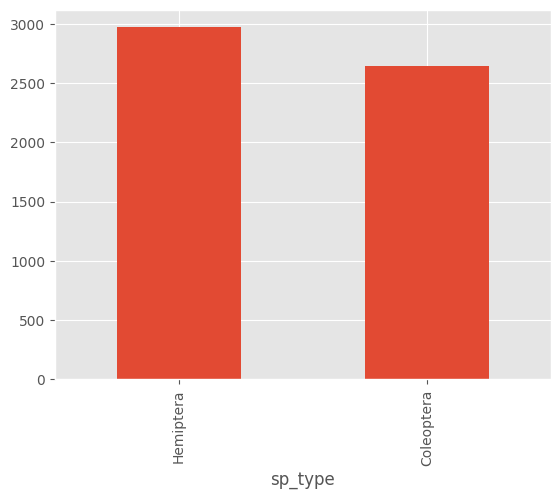

In [31]:
df['sp_type'].value_counts().plot(kind='bar')
plt.show()

In [32]:
def display_random_imgs(df , rows , cols):
    idxs = random.sample(df.index.tolist() , rows*cols)
    fig , ax = plt.subplots(rows , cols ,figsize = (10,10))
    if rows*cols != 1:
        for count , axs in enumerate(ax.flatten()):

            path = os.path.join(dataset_path, df['img_dir'].iloc[idxs[count]])
            patch = patches.Rectangle((df.bb_left.iloc[idxs[count]] * df.img_w.iloc[idxs[count]],
                                        df.bb_top.iloc[idxs[count]]* df.img_h.iloc[idxs[count]]),
                                        df.bb_width.iloc[idxs[count]]* df.img_w.iloc[idxs[count]],
                                        df.bb_height.iloc[idxs[count]]* df.img_h.iloc[idxs[count]],
                                        linewidth=1, edgecolor='r', facecolor='none')
            img = plt.imread(path)
            axs.imshow(img)
            axs.add_patch(patch)
            axs.axis('off')
            axs.title.set_text(df.sp_type.iloc[idxs[count]])

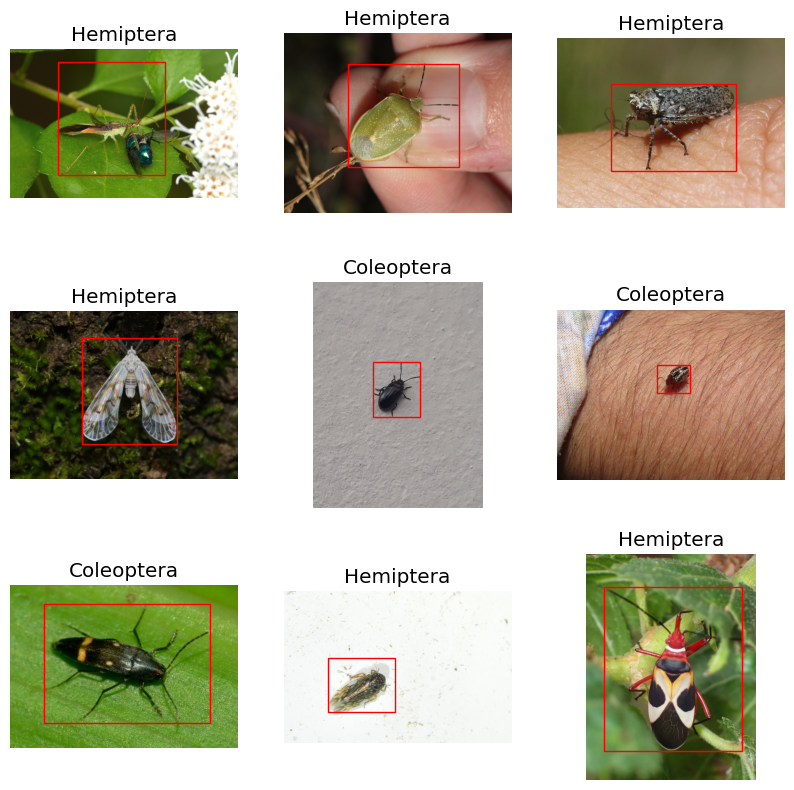

In [33]:
display_random_imgs(df, 3, 3)

In [14]:
# classes_name = ["Hymenoptera","Hemiptera","Lepidoptera","Coleoptera","Diptera","Araneae","Odonata"]
# classes_num = [0,1,2,3,4,5,6]

# df.sp_type = df.sp_type.replace(classes_name , classes_num)

In [34]:
from sklearn.model_selection import train_test_split

# Initial split: 80% for training, 20% for temp
train, temp = train_test_split(df, test_size=0.2, random_state=42)

# Split the temp set: 1/2 of temp for test, 1/2 of temp for validation (1:1 ratio in temp)
test, valid = train_test_split(temp, test_size=0.5, random_state=42)

# This results in:
# - 80% of the data in train
# - 10% of the data in test
# - 10% of the data in validation


In [35]:
train.shape, test.shape, valid.shape

((4492, 15), (561, 15), (562, 15))

In [37]:
train['sp_type'].value_counts()

sp_type
Hemiptera     2373
Coleoptera    2119
Name: count, dtype: int64

In [38]:
test['sp_type'].value_counts()

sp_type
Hemiptera     286
Coleoptera    275
Name: count, dtype: int64

In [39]:
valid['sp_type'].value_counts()

sp_type
Hemiptera     313
Coleoptera    249
Name: count, dtype: int64

In [ ]:
train.to_csv('/data/train_medata.csv', index=False)
test.to_csv('/data/test_medata.csv', index=False)
valid.to_csv('/data/valid_medata.csv', index=False)